In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from sklearn.tree import export_graphviz
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from os import system as sys

In [2]:
fuji = pd.read_csv("fuji_full_fp_sample.csv")
fuji = fuji.sample(frac=1).reset_index(drop=True)
fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,187.956233,56.641384,39633345771997547,2701,11188,sv2,bright,39633345771997547,0.114278,0.000003,...,4.331492,-49.419870,2MASSJ12314948+5638288,0,0.1143,17.093,0.531,3.502,0.093,0.287
1,271.462186,63.408650,39633427992937045,3254,15354,sv3,bright,39633427992937045,0.069595,0.000007,...,1.079839,-18.654020,2MASXJ18055094+6324314,1,0.0696,16.571,0.732,1.099,0.182,0.073
2,177.953090,54.885592,39633321856074683,2653,5974,sv2,bright,39633321856074683,0.064997,0.000023,...,7.024930,3.013896,2MASXJ11514870+5453084,0,0.0650,14.930,0.700,2.310,0.086,0.292
3,234.960101,44.606106,39633158253052802,3341,9930,sv3,bright,39633158253052802,0.073848,0.000021,...,1.537200,-34.388924,2MASXJ15395045+4436218,1,0.0739,16.799,0.754,0.543,0.501,0.071
4,243.331907,56.471846,39633342949230018,3248,11524,sv3,bright,39633342949230018,0.052617,0.000010,...,7.547570,9.544476,2MASXJ16131961+5628189,1,0.0526,14.173,0.783,0.678,0.080,0.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,198.472597,7.053336,39627956863109125,999,26501,sv1,bright,39627956863109125,0.094925,0.000013,...,2.213285,82.763990,2MASSJ13135345+0703122,1,0.0949,17.029,0.759,2.324,-9.999,0.062
6694,180.843288,51.821015,39633274850509203,2663,11003,sv2,bright,39633274850509203,0.061177,0.000009,...,2.433364,-67.058136,2MASXJ12032240+5149157,1,0.0612,15.063,0.750,0.686,0.276,0.068
6695,182.736468,-0.085903,39627787790717777,1504,26275,sv1,bright,39627787790717777,0.078695,0.000012,...,0.930212,-84.241270,2MASSJ12105675-0005093,1,0.0787,17.502,0.861,2.762,-9.999,0.062
6696,183.557818,56.979309,39633349047749541,2683,11193,sv2,bright,39633349047749541,0.051621,0.000020,...,0.766140,39.757214,2MASXJ12141390+5658460,1,0.0516,16.437,0.710,1.331,-9.999,0.053


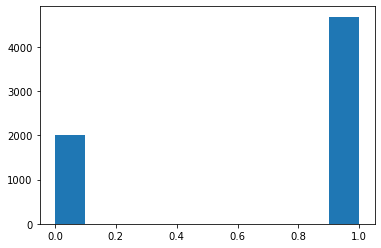

In [3]:
plt.hist(fuji.flag)
plt.show()

In [33]:
flag_mapping = {0:"Spirals",1:"Ellipticals"}
fuji.loc[:,"flag"] = fuji.flag.map(flag_mapping)
fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,187.956233,56.641384,39633345771997547,2701,11188,sv2,bright,39633345771997547,0.114278,0.000003,...,4.331492,-49.419870,2MASSJ12314948+5638288,Spirals,0.1143,17.093,0.531,3.502,0.093,0.287
1,271.462186,63.408650,39633427992937045,3254,15354,sv3,bright,39633427992937045,0.069595,0.000007,...,1.079839,-18.654020,2MASXJ18055094+6324314,Ellipticals,0.0696,16.571,0.732,1.099,0.182,0.073
2,177.953090,54.885592,39633321856074683,2653,5974,sv2,bright,39633321856074683,0.064997,0.000023,...,7.024930,3.013896,2MASXJ11514870+5453084,Spirals,0.0650,14.930,0.700,2.310,0.086,0.292
3,234.960101,44.606106,39633158253052802,3341,9930,sv3,bright,39633158253052802,0.073848,0.000021,...,1.537200,-34.388924,2MASXJ15395045+4436218,Ellipticals,0.0739,16.799,0.754,0.543,0.501,0.071
4,243.331907,56.471846,39633342949230018,3248,11524,sv3,bright,39633342949230018,0.052617,0.000010,...,7.547570,9.544476,2MASXJ16131961+5628189,Ellipticals,0.0526,14.173,0.783,0.678,0.080,0.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,198.472597,7.053336,39627956863109125,999,26501,sv1,bright,39627956863109125,0.094925,0.000013,...,2.213285,82.763990,2MASSJ13135345+0703122,Ellipticals,0.0949,17.029,0.759,2.324,-9.999,0.062
6694,180.843288,51.821015,39633274850509203,2663,11003,sv2,bright,39633274850509203,0.061177,0.000009,...,2.433364,-67.058136,2MASXJ12032240+5149157,Ellipticals,0.0612,15.063,0.750,0.686,0.276,0.068
6695,182.736468,-0.085903,39627787790717777,1504,26275,sv1,bright,39627787790717777,0.078695,0.000012,...,0.930212,-84.241270,2MASSJ12105675-0005093,Ellipticals,0.0787,17.502,0.861,2.762,-9.999,0.062
6696,183.557818,56.979309,39633349047749541,2683,11193,sv2,bright,39633349047749541,0.051621,0.000020,...,0.766140,39.757214,2MASXJ12141390+5658460,Ellipticals,0.0516,16.437,0.710,1.331,-9.999,0.053


In [34]:
print (len(fuji))

6698


In [35]:
fuji_train = fuji.head(4000)
fuji_test = fuji.tail(2698)

In [36]:
fuji.keys()

Index(['ra_1', 'dec_1', 'targetid_1', 'id', 'healpix', 'survey', 'program',
       'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype', 'subtype',
       'deltachi2', 'healpix_id', 'obsconditions', 'release', 'brickid_1',
       'brick_objid', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR',
       'snr_ppxf', 'TYPE', 'SERSIC_2', 'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g',
       'mag_r', 'mag_z', 'mag_B', 'mag_g_err', 'mag_r_err', 'mag_z_err',
       'fibre_mag_g', 'fibre_mag_r', 'fibre_mag_z', 'uncor_radius',
       'uncor_radius_err', 'BA_ratio', 'BA_ratio_error', 'circ_radius',
       'pos_angle', 'tmass', 'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3',
       'W2_W3_err', 'PS1_ibumpy'],
      dtype='object')

In [37]:
cols = ['sersic_1','mag_g','mag_r','mag_z','uncor_radius','BA_ratio','pos_angle','g_r_PS1_5_cor','W2_W3']
cols

['sersic_1',
 'mag_g',
 'mag_r',
 'mag_z',
 'uncor_radius',
 'BA_ratio',
 'pos_angle',
 'g_r_PS1_5_cor',
 'W2_W3']

In [38]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [39]:
clf.fit(fuji_train[cols],fuji_train.flag)

DecisionTreeClassifier(max_depth=5)

In [40]:
train_predictions = clf.predict(fuji_train[cols])

In [41]:
test_predictions = clf.predict(fuji_test[cols])

In [42]:
train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
train_accuracy

0.86625

In [43]:
test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
test_accuracy

0.8506300963676797

In [44]:
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(fuji_train[cols],fuji_train.flag)
    train_predictions = clf.predict(fuji_train[cols])
    test_predictions = clf.predict(fuji_test[cols])
    train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

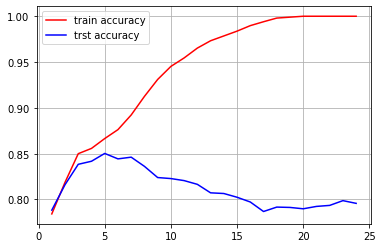

In [45]:
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="trst accuracy")
plt.grid()
plt.legend()
plt.show()

In [46]:
fuji_train["flag"].values

array(['Spirals', 'Ellipticals', 'Spirals', ..., 'Ellipticals',
       'Ellipticals', 'Ellipticals'], dtype=object)

In [47]:
export_graphviz(
            clf,
            out_file="fuji_tree.dot",
            feature_names=cols,
            class_names=fuji_train.flag,
            rounded=True,
            filled=True
        )

In [48]:
sys("dot -Tpng fuji_tree.dot -o fuji_tree.png")

0